<a href="https://colab.research.google.com/github/nishantsakesh/nishantsakesh/blob/main/TextToImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import numpy as np
!pip install datasets transformers

from datasets import load_dataset
from transformers import AutoTokenizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
dataset = load_dataset("jainr3/diffusiondb-pixelart")
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


diffusiondb-pixelart.py:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

The repository for jainr3/diffusiondb-pixelart contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/jainr3/diffusiondb-pixelart.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


part-000001.zip:   0%|          | 0.00/10.0M [00:00<?, ?B/s]

metadata.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

/root/.cache/huggingface/hub/datasets--jainr3--diffusiondb-pixelart/snapshots/05bae04ee9a090d2935f0f17a978b94858f39083/metadata.parquet
DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 1000
    })
})


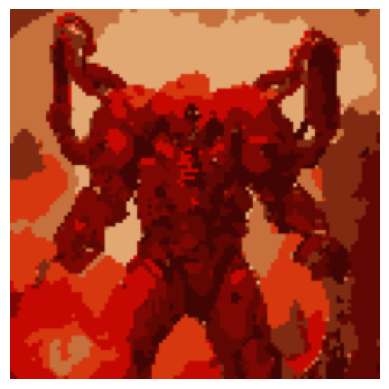

In [ ]:
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd

# Define image transformation
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Check if transformation works
def show_image(image):
    plt.imshow(transforms.ToPILImage()(image))
    plt.axis('off')
    plt.show()

# Apply the transformation and show an example
example_image = dataset['train'][0]['image']  # Get an example image
transformed_image = image_transforms(example_image)
show_image(transformed_image)


In [ ]:
# Print a sample from the dataset
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 1000
    })
})


In [ ]:
from torchvision import transforms

# Define the transformation to convert images to tensors
image_transforms = transforms.Compose([
    transforms.Resize((3840, 2160)),  # Resize to 256x256
    transforms.ToTensor()           # Convert to tensor
])


In [ ]:
def collate_fn(batch):
    for item in batch:
        item['image'] = image_transforms(item['image'])
    return {key: [d[key] for d in batch] for key in batch[0].keys()}


In [ ]:
!pip install transformers diffusers accelerate
!pip install safetensors
from diffusers import StableDiffusionPipeline
import torch

# Check if a GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the Stable Diffusion v1.5 pipeline with appropriate dtype
if device == "cuda":
    pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
else:
    pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.7 MB/s eta 0:00:00


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Please enter a description of the image you want to generate: dog dancing


  0%|          | 0/50 [00:00<?, ?it/s]

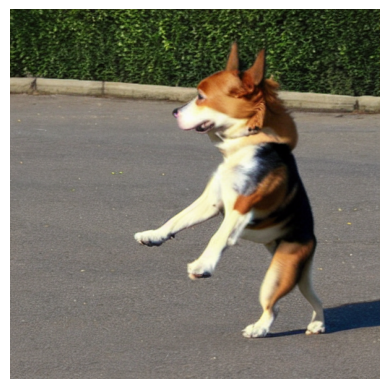

In [ ]:
def generate_image(pipe, device):
  prompt = input("Please enter a description of the image you want to generate: ")
  pipe.to(device)
  image = pipe(prompt).images[0]
  return image
# Generate and display the image
image = generate_image(pipe, device)
# Display the image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

Model saved as text_to_image_model.pth
